In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Load data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Reshape and one-hot encode
X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train_full = to_categorical(y_train_full)
y_test = to_categorical(y_test)

# Split validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

In [3]:
#NEURAL NETWORK MODEL ARCHITECTURE

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [4]:
#COMPILING THE MODEL

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

#TRAINING THE MODEL

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=18,
    batch_size=128,
    verbose=2
)


Epoch 1/18
375/375 - 360s - loss: 0.4132 - accuracy: 0.8707 - val_loss: 0.0856 - val_accuracy: 0.9749 - 360s/epoch - 959ms/step
Epoch 2/18
375/375 - 249s - loss: 0.1358 - accuracy: 0.9593 - val_loss: 0.0625 - val_accuracy: 0.9819 - 249s/epoch - 664ms/step
Epoch 3/18
375/375 - 239s - loss: 0.0983 - accuracy: 0.9704 - val_loss: 0.0498 - val_accuracy: 0.9862 - 239s/epoch - 637ms/step
Epoch 4/18
375/375 - 232s - loss: 0.0866 - accuracy: 0.9737 - val_loss: 0.0443 - val_accuracy: 0.9882 - 232s/epoch - 618ms/step
Epoch 5/18
375/375 - 214s - loss: 0.0729 - accuracy: 0.9778 - val_loss: 0.0379 - val_accuracy: 0.9887 - 214s/epoch - 571ms/step
Epoch 6/18
375/375 - 229s - loss: 0.0652 - accuracy: 0.9801 - val_loss: 0.0367 - val_accuracy: 0.9895 - 229s/epoch - 610ms/step
Epoch 7/18
375/375 - 223s - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0352 - val_accuracy: 0.9890 - 223s/epoch - 595ms/step
Epoch 8/18
375/375 - 350s - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0315 - val_accuracy: 0.9911 - 

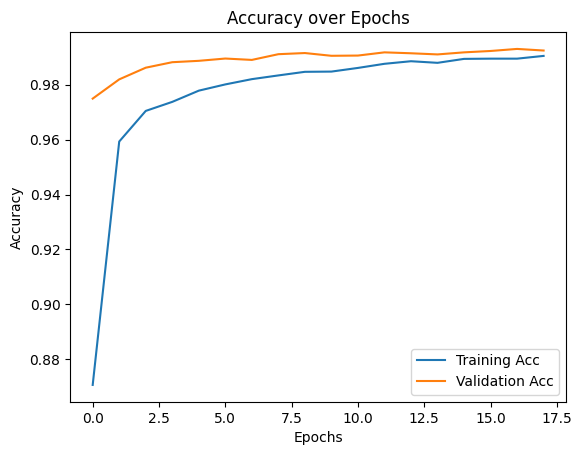

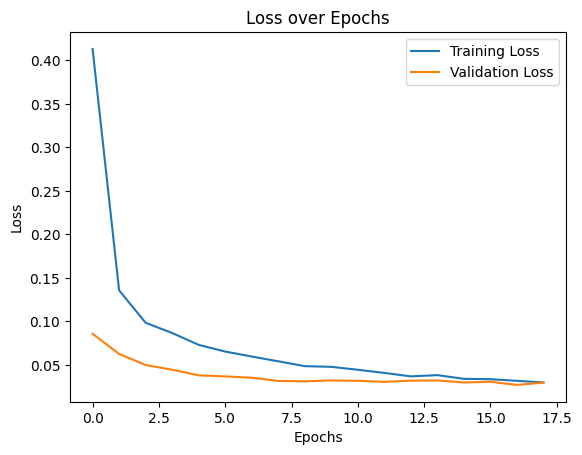

In [5]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
#Model Evaluation

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9929


313/313 [==============================] - 27s 70ms/step


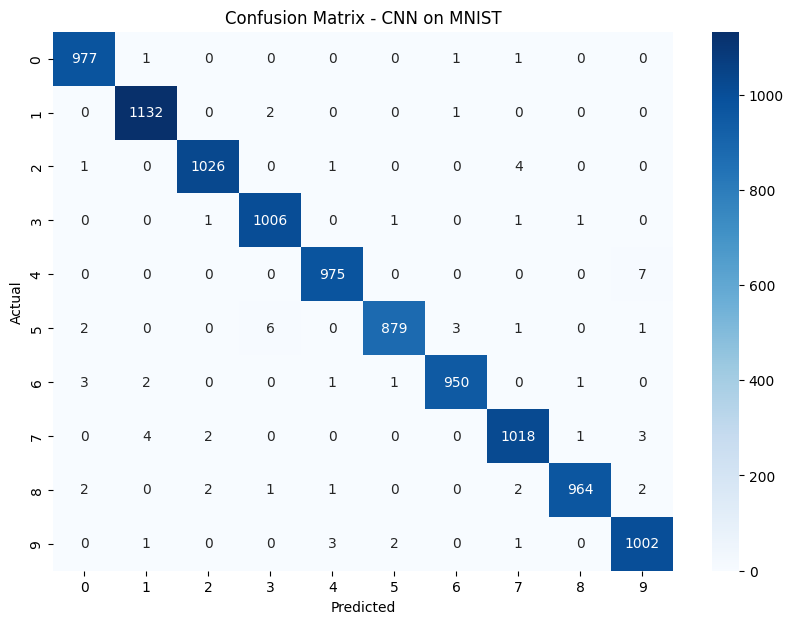

In [7]:
#CONFUSION MATRIX AND REPORT

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN on MNIST')
plt.show()



In [8]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [9]:
#SAMPLE PREDICTIONS

def show_sample_predictions(X, y_true, y_pred, num_samples=6):
    plt.figure(figsize=(12, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28,28), cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

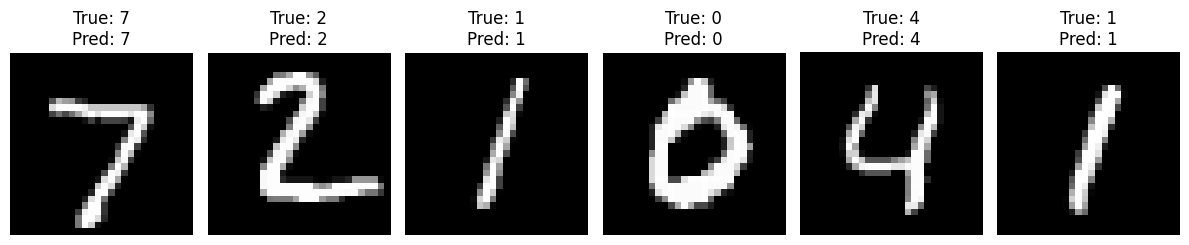

In [10]:
# Show a few predictions
show_sample_predictions(X_test, y_true_classes, y_pred_classes)